<a href="https://colab.research.google.com/github/Renshui-MC/Coursera_ML/blob/main/Coursera_ML/SupervisedML_RegressionAndClassification/week1/Coursera_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/PostDoc/Colab Notebooks/Coursera/Coursera_ML/SupervisedML_RegressionAndClassification/week1/

/content/drive/MyDrive/PostDoc/Colab Notebooks/Coursera/Coursera_ML/SupervisedML_RegressionAndClassification/week1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

We have two rows that represent two training examples, e.g., $x^{i}$ where $i$ represents the number of training examples. 

size (1000 sqft)         | price (1000 dollars)| 
-------------------|--------------------
(1) 1.0              | 300              
(2) 2.0              | 500   


In [4]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


two training examples

In [5]:
print(f"size of x_train = {x_train.size}")
print(f"size of y_train = {y_train.size}")

size of x_train = 2
size of y_train = 2


Get number of training examples using `.shape`. `NumPy` arrays have an attribute called `shape` that returns a `tuple` with each **index** having the number of corresponding elements. 

+ `shape` is an instance attribute (dynamic)
+ class attribute is static (always same)

[https://www.freecodecamp.org/news/python-attributes-class-and-instance-attribute-examples/#:~:text=Class%20and%20Instance%20Attributes%20in,same%20for%20every%20new%20object.](https://www.freecodecamp.org/news/python-attributes-class-and-instance-attribute-examples/#:~:text=Class%20and%20Instance%20Attributes%20in,same%20for%20every%20new%20object.)

In [6]:
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

Number of training examples is: 2


In [7]:
x = x_train.shape
type(x)

tuple

`ndmin` specifies the dimension of a created array. In this example, `index 4` refers to the `5th` dimension (last dimension) as the dimension starts from $0$ in python. The following example creates $5$ dimensions with the last dimension containing $6$ elements. It is accessed by `arr.shape[4]`.

In [8]:
arr = np.array([1, 2, 3, 4, 5, 6], ndmin=5)
arr.shape[0]
print(arr)
print('shape of array :', arr.shape[4])

[[[[[1 2 3 4 5 6]]]]]
shape of array : 6


## training examples

1. to access training examples ($x^{(i)}$ and $y^{(i)}$) in a `Numpy` array through indexing.

+ `x_train[i]` and `y_train[i]`


In [9]:
i = 1 # test i = 1

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i})), y^({i}) = ({x_i}, {y_i})")

(x^(1)), y^(1) = (2.0, 500.0)


##Plotting the data

`matplotlib.pyplot` is a collection of functions that make `matplotlib` work like `MATLAB`.

1. `matplotlib` is a python library

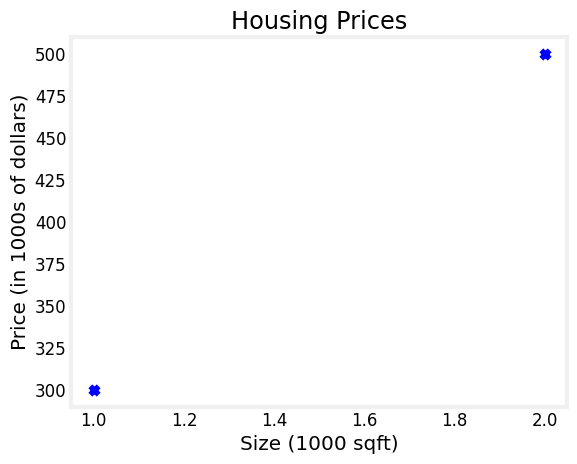

In [10]:
# Plotthe data points
plt.scatter(x_train, y_train, marker = 'x', c='b')
plt.title('Housing Prices')
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()

##Model function

Linear regression with weights and biases. 

$f_{w,b}(x^{(i)}) = wx^{(i)} + b$

1. guess our weights and biases, i.e., $w = 100$ and $b = 100$
2. to avoid repetition we create a function

In [11]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


In [12]:
def compute_model_output(x, w, b):
  """
  linear regression model
  
  Args:
    x (ndarray (m,)): a vector, m training examples
    w,b.            : model paramters (weights and biases)
  Returns
    y (ndarray (m,)): target 
  """
  
  m = x.shape[0] #vector only has one dimension
  f_wb = np.zeros(m) #create a corresponding output vector variable
  
  for i in range(m):
    f_wb[i] = w * x[i] + b
  return f_wb

## Training

In [13]:
x = x_train
print(x)

[1. 2.]


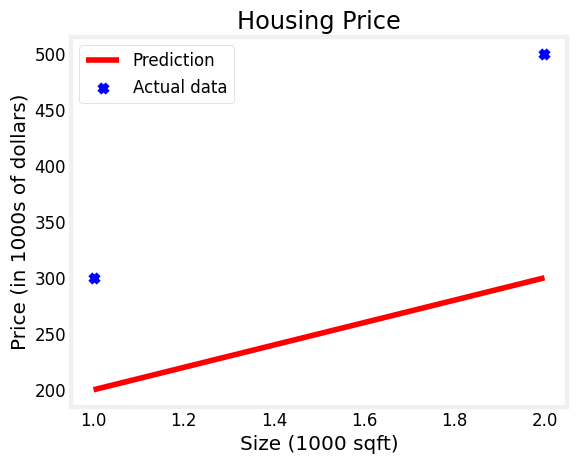

In [15]:
tmp_f_wb = compute_model_output(x_train, w, b)

#plot the prediction
plt.plot(x_train, tmp_f_wb, c='r', label='Prediction')#x_train represents x coordinates that remain the same

#plot the data points
plt.scatter(x_train, y_train, marker='x', c='b', label='Actual data')

# set the title
plt.title("Housing Price")

# set the y-axis label
plt.ylabel("Price (in 1000s of dollars)")

# set the x-axis label
plt.xlabel("Size (1000 sqft)")
plt.legend()
plt.show()


Let's try different weights to get better prediction. Later we will train the model parameters to get more accurate results. 

1. $w  = 200$
2. $b = 100$

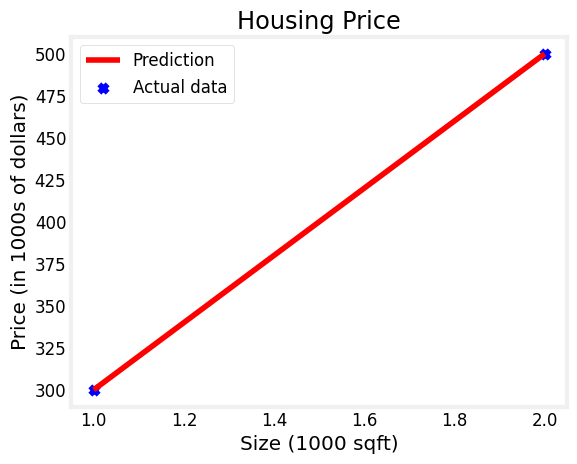

In [16]:
w = 200
b = 100

tmp_f_wb = compute_model_output(x_train, w, b)

#plot the prediction
plt.plot(x_train, tmp_f_wb, c='r', label='Prediction')#x_train represents x coordinates that remain the same

#plot the data points
plt.scatter(x_train, y_train, marker='x', c='b', label='Actual data')

# set the title
plt.title("Housing Price")

# set the y-axis label
plt.ylabel("Price (in 1000s of dollars)")

# set the x-axis label
plt.xlabel("Size (1000 sqft)")
plt.legend()
plt.show()

##Prediction

1. using `np.array` to convert an int or a float input to an array

2. passing the input into the linear model `compute_model_ouput`

In [17]:
w = 200
b = 100

# test using a new input
x_i = 1.2 

# convert x_i to an array using np.array
x_pred = np.array([x_i])

# passing the vector into the linear model (only one input variable)
tmp_f_wb = compute_model_output(x_pred, w, b)

print(f"tmp_f_wb: {tmp_f_wb}")

tmp_f_wb: [340.]


April 5th 2023.